# Titanic Machine Learning Competition, from Kaggle.

##### ETAPES  DU  PROJET

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Train set
train = pd.read_csv(r"C:\Users\Florian AGBODJI\Documents\DataProjects\Machine_Learning\Projects\Titanic Kaggle Challenge\train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Test set
test = pd.read_csv(r"C:\Users\Florian AGBODJI\Documents\DataProjects\Machine_Learning\Projects\Titanic Kaggle Challenge\test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 1- Exploratory Data Analysis (EDA)

In [4]:
# Nombre de lignes et de colonnes
train.shape

(891, 12)

In [5]:
test.shape

(418, 11)

In [6]:
# Nombre de variables (catégorielles)
train.select_dtypes('object')

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [7]:
test.select_dtypes('object')

,Name,Sex,Ticket,Cabin,Embarked
0,"Kelly, Mr. James",male,330911,NaN,Q
1,"Wilkes, Mrs. James (Ellen Needs)",female,363272,NaN,S
2,"Myles, Mr. Thomas Francis",male,240276,NaN,Q
3,"Wirz, Mr. Albert",male,315154,NaN,S
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,3101298,NaN,S
...,...,...,...,...,...
413,"Spector, Mr. Woolf",male,A.5. 3236,NaN,S
414,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
415,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,NaN,S
416,"Ware, Mr. Frederick",male,359309,NaN,S


In [8]:
# Valeurs manquantes train set
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
# Pourcentage de valeurs manquantes par colonne pour le train set
for col in train.columns:
    print(f'{col :-<50} {100 * (train[col].isna().sum() / train.shape[0])}')

PassengerId--------------------------------------- 0.0
Survived------------------------------------------ 0.0
Pclass-------------------------------------------- 0.0
Name---------------------------------------------- 0.0
Sex----------------------------------------------- 0.0
Age----------------------------------------------- 19.865319865319865
SibSp--------------------------------------------- 0.0
Parch--------------------------------------------- 0.0
Ticket-------------------------------------------- 0.0
Fare---------------------------------------------- 0.0
Cabin--------------------------------------------- 77.10437710437711
Embarked------------------------------------------ 0.22446689113355783


In [11]:
# Valeurs manquantes test set
(test.isna().sum() / test.shape[0]).sort_values(ascending = False)

Cabin          0.782297
Age            0.205742
Fare           0.002392
PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Embarked       0.000000
dtype: float64

In [12]:
# Pourcentage de valeurs manquantes par colonne pour le test set
for col in test.columns:
    print(f'{col :-<50} {100 * (test[col].isna().sum() / test.shape[0])}')

PassengerId--------------------------------------- 0.0
Pclass-------------------------------------------- 0.0
Name---------------------------------------------- 0.0
Sex----------------------------------------------- 0.0
Age----------------------------------------------- 20.574162679425836
SibSp--------------------------------------------- 0.0
Parch--------------------------------------------- 0.0
Ticket-------------------------------------------- 0.0
Fare---------------------------------------------- 0.23923444976076555
Cabin--------------------------------------------- 78.22966507177034
Embarked------------------------------------------ 0.0


<Axes: >

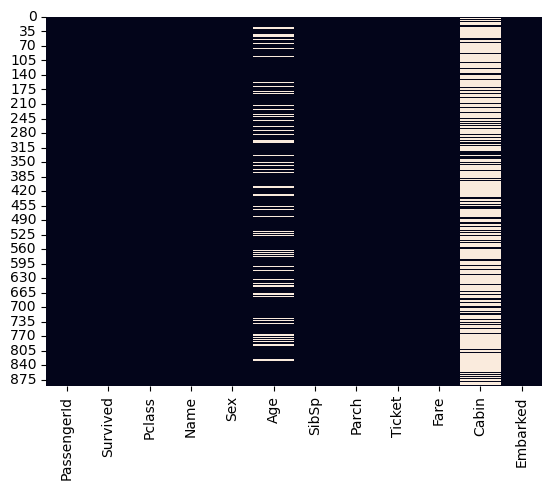

In [13]:
# Recheck and show all the null values train set
sns.heatmap(train.isna(), cbar = False)

<Axes: >

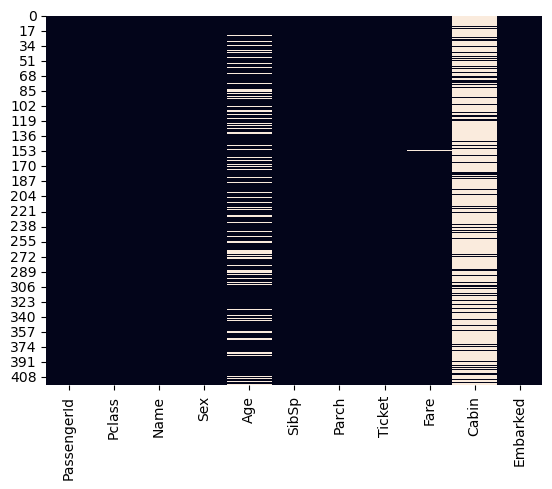

In [14]:
# Recheck and show all the null values test set
sns.heatmap(test.isna(), cbar = False)

In [15]:
# Supprimer les colonnes où les valeurs manquantes sont plus de 77%
train = train.drop(columns = train.columns[(train.isna().sum()/train.shape[0]) > 0.75] , axis = 1)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
train.shape

(891, 11)

In [17]:
test = test.drop(columns = test.columns[(test.isna().sum()/test.shape[0]) > 0.75] , axis = 1)

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [18]:
test.shape

(418, 10)

In [19]:
# Types de variables
train.dtypes.value_counts()

int64      5
object     4
float64    2
dtype: int64

In [20]:
# Relation Target / Variables

<Axes: xlabel='Age', ylabel='count'>

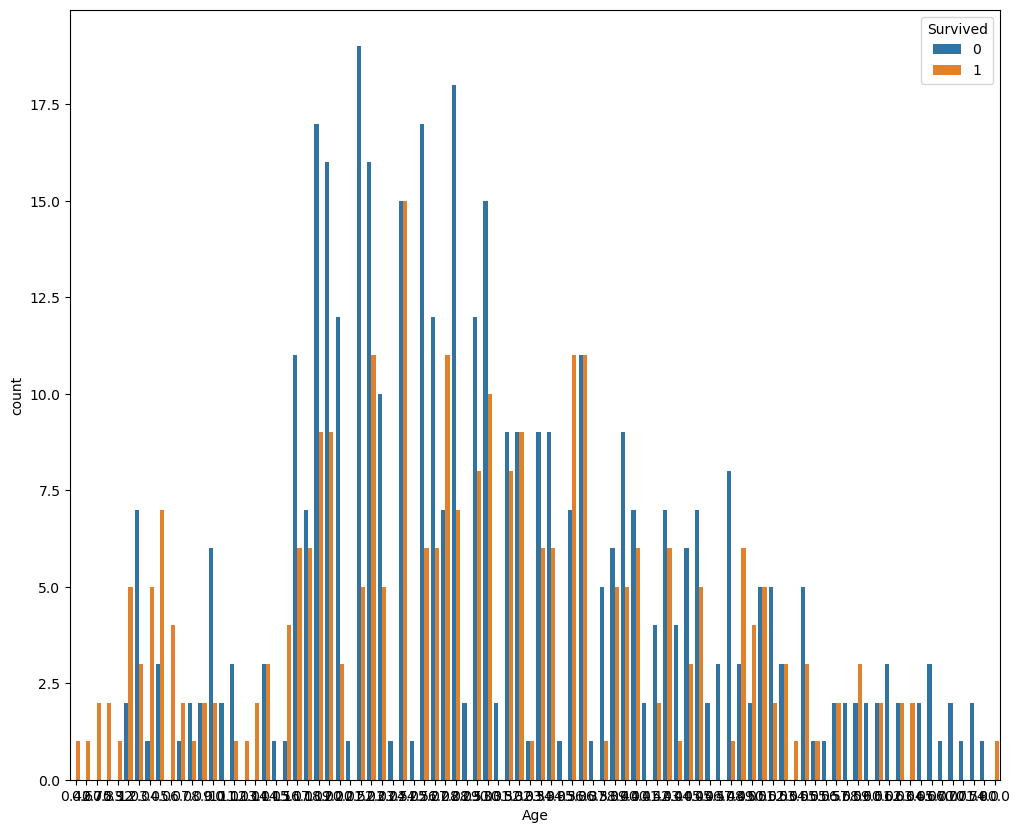

In [21]:
# Relation Target / Age
plt.figure(figsize = (12, 10))
sns.countplot(x = 'Age', hue = 'Survived', data  = train)

In [22]:
# Relation Target / Variables à partir de tests statistiques (T-test, Student)

In [23]:
# Prendre les variables quantitatives et les diviser selon la survie ou le décès
var_quanti = train.select_dtypes(['int64', 'float64'])

var_quanti_survi = var_quanti[var_quanti['Survived'] == 1] # survie
var_quanti_deces = var_quanti[var_quanti['Survived'] == 0] # décès

In [24]:
var_quanti_survi.drop(columns = ['PassengerId', 'Survived'], inplace = True)
var_quanti_deces.drop(columns = ['PassengerId', 'Survived'], inplace = True)

In [25]:
var_quanti_survi.shape

(342, 5)

In [26]:
var_quanti_deces.shape

(549, 5)

In [27]:
from scipy.stats import ttest_ind

In [28]:
for col in var_quanti_survi.columns:
    stats, p = ttest_ind(var_quanti_survi[col].dropna(), var_quanti_deces.sample(var_quanti_survi.shape[0])[col].dropna())
    if p < 0.05:
        print(f'{col :-<50} H0 rejetée')
    else:
        print(f'{col :-<50} 0')

Pclass-------------------------------------------- H0 rejetée
Age----------------------------------------------- H0 rejetée
SibSp--------------------------------------------- 0
Parch--------------------------------------------- 0
Fare---------------------------------------------- H0 rejetée


## 2- Modelling

### Preprocessing

In [29]:
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


In [30]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [31]:
for col in train.columns:
    print(f'{col :-<20} {train[col].nunique()}')

PassengerId--------- 891
Survived------------ 2
Pclass-------------- 3
Name---------------- 891
Sex----------------- 2
Age----------------- 88
SibSp--------------- 7
Parch--------------- 7
Ticket-------------- 681
Fare---------------- 248
Embarked------------ 3


In [32]:
# On va supprimer les variables catégorielles ayant plus de 10 catégories

train.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Fare'], inplace = True)

In [33]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [34]:
test_id = test[['PassengerId']] # conserver les id des passagers

test.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Fare'], inplace = True)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S
2,2,male,62.0,0,0,Q
3,3,male,27.0,0,0,S
4,3,female,22.0,1,1,S


In [35]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [36]:
# Encodage

def encodage(df):
    code = {'male' : 0,
           'female' : 1,
           'S' : 0,
           'C' : 1,
           'Q' : 2}
    
    for col in df.select_dtypes('object'):
        df.loc[:, col] = df[col].map(code)
    
    return (df)

In [37]:
# Imputation

def imputation(df):
    df = df.dropna(axis = 0)
    return(df)

In [38]:
# Preprocessing

def preprocessing(df):
    
    df = encodage(df)
    # df = imputation(df)
    
    return (df)

In [39]:
print(train.shape)
print(test.shape)

(891, 7)
(418, 6)


In [40]:
train = preprocessing(train)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0.0
1,1,1,1,38.0,1,0,1.0
2,1,3,1,26.0,0,0,0.0
3,1,1,1,35.0,1,0,0.0
4,0,3,0,35.0,0,0,0.0


In [41]:
test = preprocessing(test)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,34.5,0,0,2
1,3,1,47.0,1,0,0
2,2,0,62.0,0,0,2
3,3,0,27.0,0,0,0
4,3,1,22.0,1,1,0


In [42]:
print(train.shape)
print(test.shape)

(891, 7)
(418, 6)


In [43]:
# Target et features pour train et test set
X_train = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]
y_train = train['Survived']

In [44]:
X_test = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]

### Modelisation

In [45]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline 
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.impute import KNNImputer

In [91]:
# Pipeline
# Utiliser un test ANOVA pour sélectionner les 10 meilleures variables ayant les liens les plus forts

preprocessor = make_pipeline(KNNImputer(), PolynomialFeatures(2, include_bias = False), SelectKBest(f_classif, k = 10))

In [92]:
# K-Nearest Neighbors
knn = make_pipeline(preprocessor, KNNImputer(), StandardScaler(), KNeighborsClassifier())

# Random Forest
random = make_pipeline(preprocessor, KNNImputer(), RandomForestClassifier(random_state = 0))

# SVM: Support Vector Machines
svm = make_pipeline(preprocessor, KNNImputer(), StandardScaler(), SVC(random_state = 0))

In [93]:
model_list = {'KNN' : knn,
             'Random Forest' : random,
             'SVM' : svm}

In [82]:
def evaluation(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv = 4, scoring = 'f1',
                                              train_sizes = np.linspace(0.1, 1, 10))
    
    plt.figure(figsize=(12, 10))
    plt.plot(N, train_score.mean(axis = 1), label = 'train score')
    plt.plot(N, val_score.mean(axis = 1), label = 'val score')
    plt.legend()
    
    return(y_pred)

KNN
Random Forest
SVM


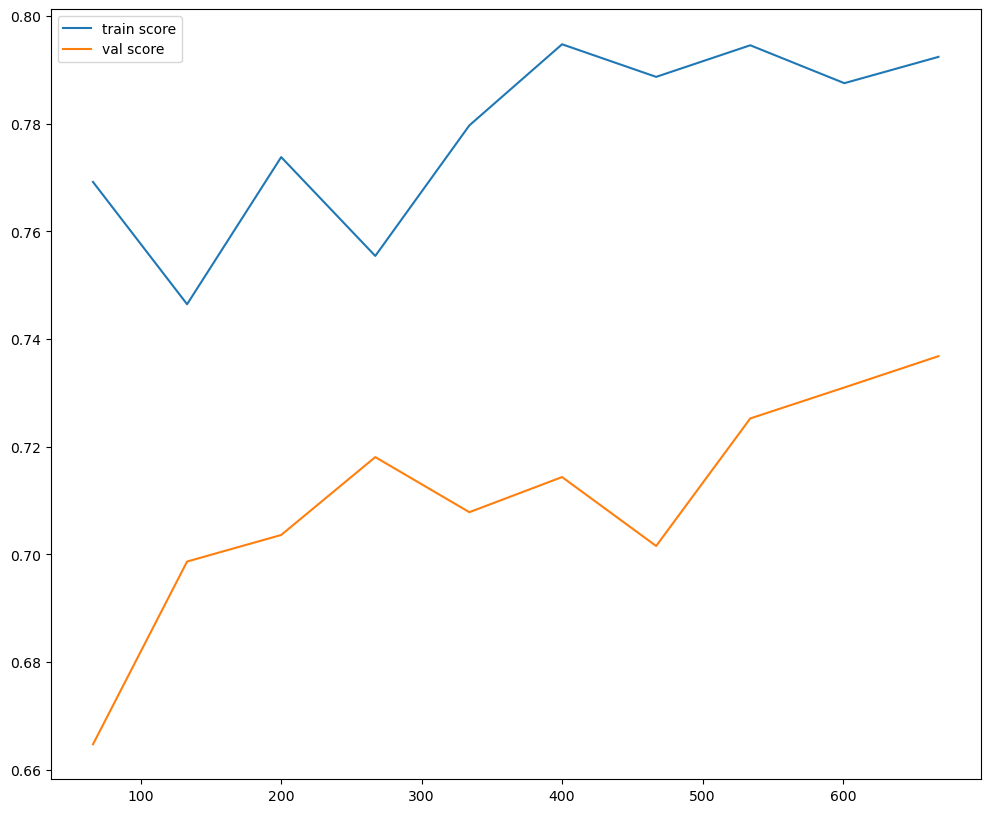

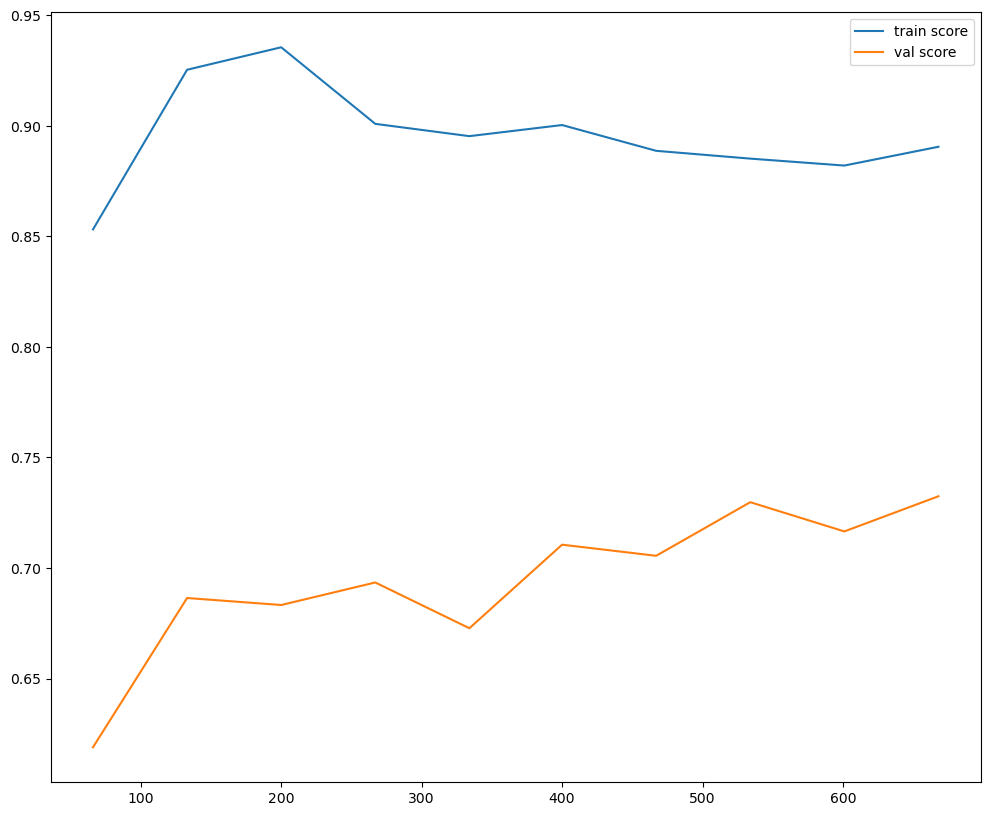

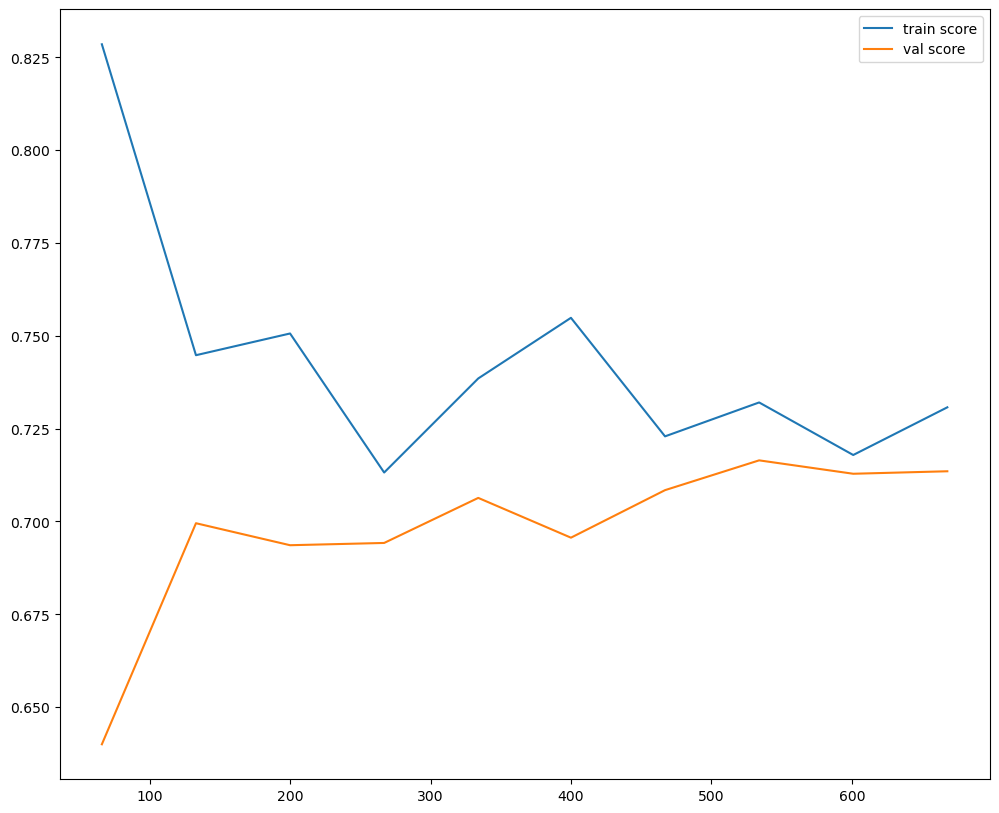

In [83]:
for model_name, model in model_list.items():
    print(model_name)
    evaluation(model)

In [94]:
model_final = knn
model_final.fit(X_train, y_train)
y_pred = model_final.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [95]:
y_pred.shape

(418,)

In [96]:
test_id.PassengerId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [97]:
# Dataframe with the passengers' id

test_id.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [98]:
# Dataframe with the prediction

y_pred_df = pd.DataFrame({'Survived' : y_pred})
y_pred_df.head()

,Survived
0,0
1,0
2,0
3,1
4,0


In [99]:
# Merge the two dataframes based on their index

result = test_id.join(y_pred_df)
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [100]:
# Upload the result to a csv file

result.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
